# Value Factor

This notebook is used to create factor from stock universe with guidance of Amundi.


There is no single way to define value factor. In this notebook we use many parameters to make factor. Then we analyse the factor in terms of performance and sector loadings.

Value factor performs well in recovery of the economy, because prices have just surged but companies that are good still exist.

Value trap: cheap stocks that do not appreciate. Real value companies should have strong fundamentals

## Universe

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We choose Europian Stocks as investment universe. MSCI EU index. The data was retrived from Bloomberg. For downloading need only filters

In [62]:
# cap-weighted MSCI EU
universe = pd.read_excel('data/UNIVERS Jan2025 Data.xlsx', header=1, index_col=1)

In [63]:
universe_initial = pd.read_excel('data/UNIVERS Jan2025 Data.xlsx', header=1, index_col=1)

In [64]:
universe.loc['Bayerische Motoren Werke AG',:]

,Ticker,Weight,id_isin,PX_LAST,Trail_12M_EPS,DVD_SH_12M,BOOK_VAL_PER_SH,TRAIL_12M_SALES_PER_SH,INDUSTRY_SECTOR,GICS_SECTOR_NAME,COUNTRY,COUNTRY_FULL_NAME,CUR_MKT_CAP,Performance,ROE
Name,,,,,,,,,,,,,,,
Bayerische Motoren Werke AG,BMW GY Equity,0.007402,DE0005190003,93.78,17.286032,8.5,138.405785,237.095355,"Consumer, Cyclical",Consumer Discretionary,GE,GERMANY,5.953467e+10,20.868313,22.219195
Bayerische Motoren Werke AG,BMW3 GY Equity,0.001300,DE0005190037,87.60,17.286032,8.52,138.405785,237.095355,"Consumer, Cyclical",Consumer Discretionary,GE,GERMANY,5.953467e+10,13.073528,22.219195


In [65]:
# obviously weight is = 1
universe.Weight.sum()

1.0000000000000002

In [66]:
cap_msci = universe['CUR_MKT_CAP'].sum()

In [67]:
# actual weights are different from market cap weights
universe['Weight_2'] = universe['CUR_MKT_CAP'] / universe['CUR_MKT_CAP'].sum()
universe['Weight'] - universe['Weight_2']

Name
ASML Holding NV                        0.023423
LVMH Moet Hennessy Louis Vuitton SE   -0.012146
SAP SE                                 0.007472
TotalEnergies SE                       0.008687
Siemens AG                             0.008342
                                         ...   
Bayerische Motoren Werke AG           -0.008917
Verbund AG                            -0.003178
EDP Renovaveis SA                     -0.001542
Volkswagen AG                         -0.009681
Naturgy Energy Group SA               -0.003457
Length: 103, dtype: float64

In [68]:
universe.head()

,Ticker,Weight,id_isin,PX_LAST,Trail_12M_EPS,DVD_SH_12M,BOOK_VAL_PER_SH,TRAIL_12M_SALES_PER_SH,INDUSTRY_SECTOR,GICS_SECTOR_NAME,COUNTRY,COUNTRY_FULL_NAME,CUR_MKT_CAP,Performance,ROE,Weight_2
Name,,,,,,,,,,,,,,,,
ASML Holding NV,ASML NA Equity,0.076723,NL0010273215,777.40,19.910000,5.96,33.665714,69.986473,Technology,Information Technology,NE,NETHERLANDS,3.105571e+11,35.311638,70.421460,0.053300
LVMH Moet Hennessy Louis Vuitton SE,MC FP Equity,0.046714,FR0000121014,684.10,32.006717,12.5,115.570259,169.046981,"Consumer, Cyclical",Consumer Discretionary,FR,FRANCE,3.429493e+11,7.898212,26.133232,0.058860
SAP SE,SAP GY Equity,0.041312,DE0007164600,160.50,3.112258,2.05,35.096338,26.731540,Technology,Information Technology,GE,GERMANY,1.971749e+11,44.703804,8.976975,0.033841
TotalEnergies SE,TTE FP Equity,0.033010,FR0000120271,58.75,7.396071,2.91,45.368934,86.061556,Energy,Energy,FR,FRANCE,1.417198e+11,5.029833,19.247571,0.024323
Siemens AG,SIE GY Equity,0.031309,DE0007236101,167.28,10.099221,4.25,60.499791,99.133121,Industrial,Industrials,GE,GERMANY,1.338240e+11,31.070662,16.413959,0.022968


## Clean the data

In [69]:
universe.isnull().sum()

Ticker                    0
Weight                    0
id_isin                   0
PX_LAST                   0
Trail_12M_EPS             2
DVD_SH_12M                2
BOOK_VAL_PER_SH           1
TRAIL_12M_SALES_PER_SH    2
INDUSTRY_SECTOR           0
GICS_SECTOR_NAME          0
COUNTRY                   0
COUNTRY_FULL_NAME         0
CUR_MKT_CAP               0
Performance               1
ROE                       9
Weight_2                  0
dtype: int64

In [70]:
universe = universe.dropna()
universe.Weight.sum()

0.950985295588677

## What to use:

- EPS (earnings per share). Low EPS = undervalued
- Book yield = 100 * 1 / Book to price. Hugh 

In [71]:
universe.loc[:,'Book Yield'] = 100 * universe.loc[:,'BOOK_VAL_PER_SH'] / universe.loc[:,'PX_LAST']

In [72]:
universe.loc[:,"ROE_percentile"] = universe["ROE"].rank(ascending=False, method = "max") / len(universe["ROE"])*100
universe

,Ticker,Weight,id_isin,PX_LAST,Trail_12M_EPS,DVD_SH_12M,BOOK_VAL_PER_SH,TRAIL_12M_SALES_PER_SH,INDUSTRY_SECTOR,GICS_SECTOR_NAME,COUNTRY,COUNTRY_FULL_NAME,CUR_MKT_CAP,Performance,ROE,Weight_2,Book Yield,ROE_percentile
Name,,,,,,,,,,,,,,,,,,
ASML Holding NV,ASML NA Equity,0.076723,NL0010273215,777.400,19.910000,5.96,33.665714,69.986473,Technology,Information Technology,NE,NETHERLANDS,3.105571e+11,35.311638,70.421460,0.053300,4.330552,1.098901
LVMH Moet Hennessy Louis Vuitton SE,MC FP Equity,0.046714,FR0000121014,684.100,32.006717,12.5,115.570259,169.046981,"Consumer, Cyclical",Consumer Discretionary,FR,FRANCE,3.429493e+11,7.898212,26.133232,0.058860,16.893767,13.186813
SAP SE,SAP GY Equity,0.041312,DE0007164600,160.500,3.112258,2.05,35.096338,26.731540,Technology,Information Technology,GE,GERMANY,1.971749e+11,44.703804,8.976975,0.033841,21.866877,75.824176
TotalEnergies SE,TTE FP Equity,0.033010,FR0000120271,58.750,7.396071,2.91,45.368934,86.061556,Energy,Energy,FR,FRANCE,1.417198e+11,5.029833,19.247571,0.024323,77.223717,26.373626
Siemens AG,SIE GY Equity,0.031309,DE0007236101,167.280,10.099221,4.25,60.499791,99.133121,Industrial,Industrials,GE,GERMANY,1.338240e+11,31.070662,16.413959,0.022968,36.166781,35.164835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dr Ing hc F Porsche AG,P911 GY Equity,0.002101,DE000PAG9113,75.380,11.430117,1.01,45.589462,90.064869,"Consumer, Cyclical",Consumer Discretionary,GE,GERMANY,6.867118e+10,-15.672821,24.783458,0.011786,60.479520,17.582418
Endesa SA,ELE SQ Equity,0.001500,ES0130670112,18.670,1.839808,2.0854,6.853926,25.961695,Utilities,Utilities,SP,SPAIN,1.976690e+10,4.678190,46.453382,0.003393,36.710904,2.197802
Bayerische Motoren Werke AG,BMW3 GY Equity,0.001300,DE0005190037,87.600,17.286032,8.52,138.405785,237.095355,"Consumer, Cyclical",Consumer Discretionary,GE,GERMANY,5.953467e+10,13.073528,22.219195,0.010218,157.997472,21.978022


In [73]:
universe.loc[:,'ROE_percentile_Normalized'] = (universe.loc[:,'ROE_percentile'] - universe.loc[:,'ROE_percentile'].mean()) / universe.loc[:,'ROE_percentile'].std()

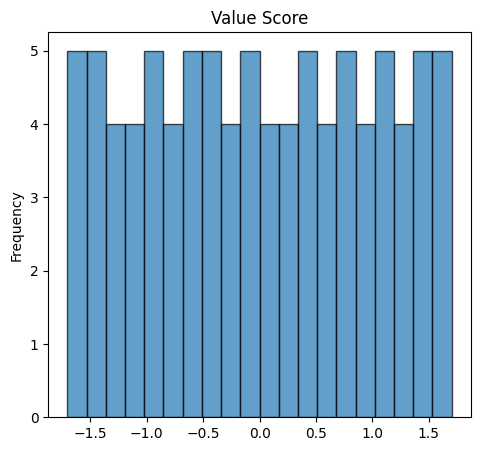

In [74]:
# Create histograms
plt.figure(figsize=(12, 5))

# Earnings Yield Histogram
plt.subplot(1, 2, 1)
plt.hist(universe.loc[:,'ROE_percentile_Normalized'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Value Score")
plt.ylabel("Frequency");

In [75]:
selected_stocks = list(universe.loc[:,'ROE_percentile_Normalized'].sort_values()[-30:].index)

# Building portfolio

In [76]:
value_unverse = universe.loc[list(set(selected_stocks)),["CUR_MKT_CAP",'GICS_SECTOR_NAME','Performance','ROE']]

In [77]:
value_unverse['value_portfolio_weight'] = value_unverse['CUR_MKT_CAP'] / np.sum(value_unverse['CUR_MKT_CAP'])

In [78]:
value_unverse

,CUR_MKT_CAP,GICS_SECTOR_NAME,Performance,ROE,value_portfolio_weight
Name,,,,,
Ferrovial SE,2.580558e+10,Industrials,34.940754,2.993131,0.017068
Henkel AG & Co KGaA,2.925884e+10,Consumer Staples,12.057840,6.321926,0.019352
Cellnex Telecom SA,2.456415e+10,Communication Services,15.329885,-2.090858,0.016247
Credit Agricole SA,4.079069e+10,Financials,30.729330,8.049322,0.026980
Orange SA,2.995756e+10,Communication Services,11.022520,7.250643,0.019815
SAP SE,1.971749e+11,Information Technology,44.703804,8.976975,0.130416
Vonovia SE,2.241088e+10,Real Estate,29.609442,-2.004727,0.014823
Danone SA,4.157460e+10,Consumer Staples,19.195616,5.369928,0.027498
Telefonica SA,2.196100e+10,Communication Services,4.401767,11.194285,0.014526


In [79]:
len(value_unverse)

30

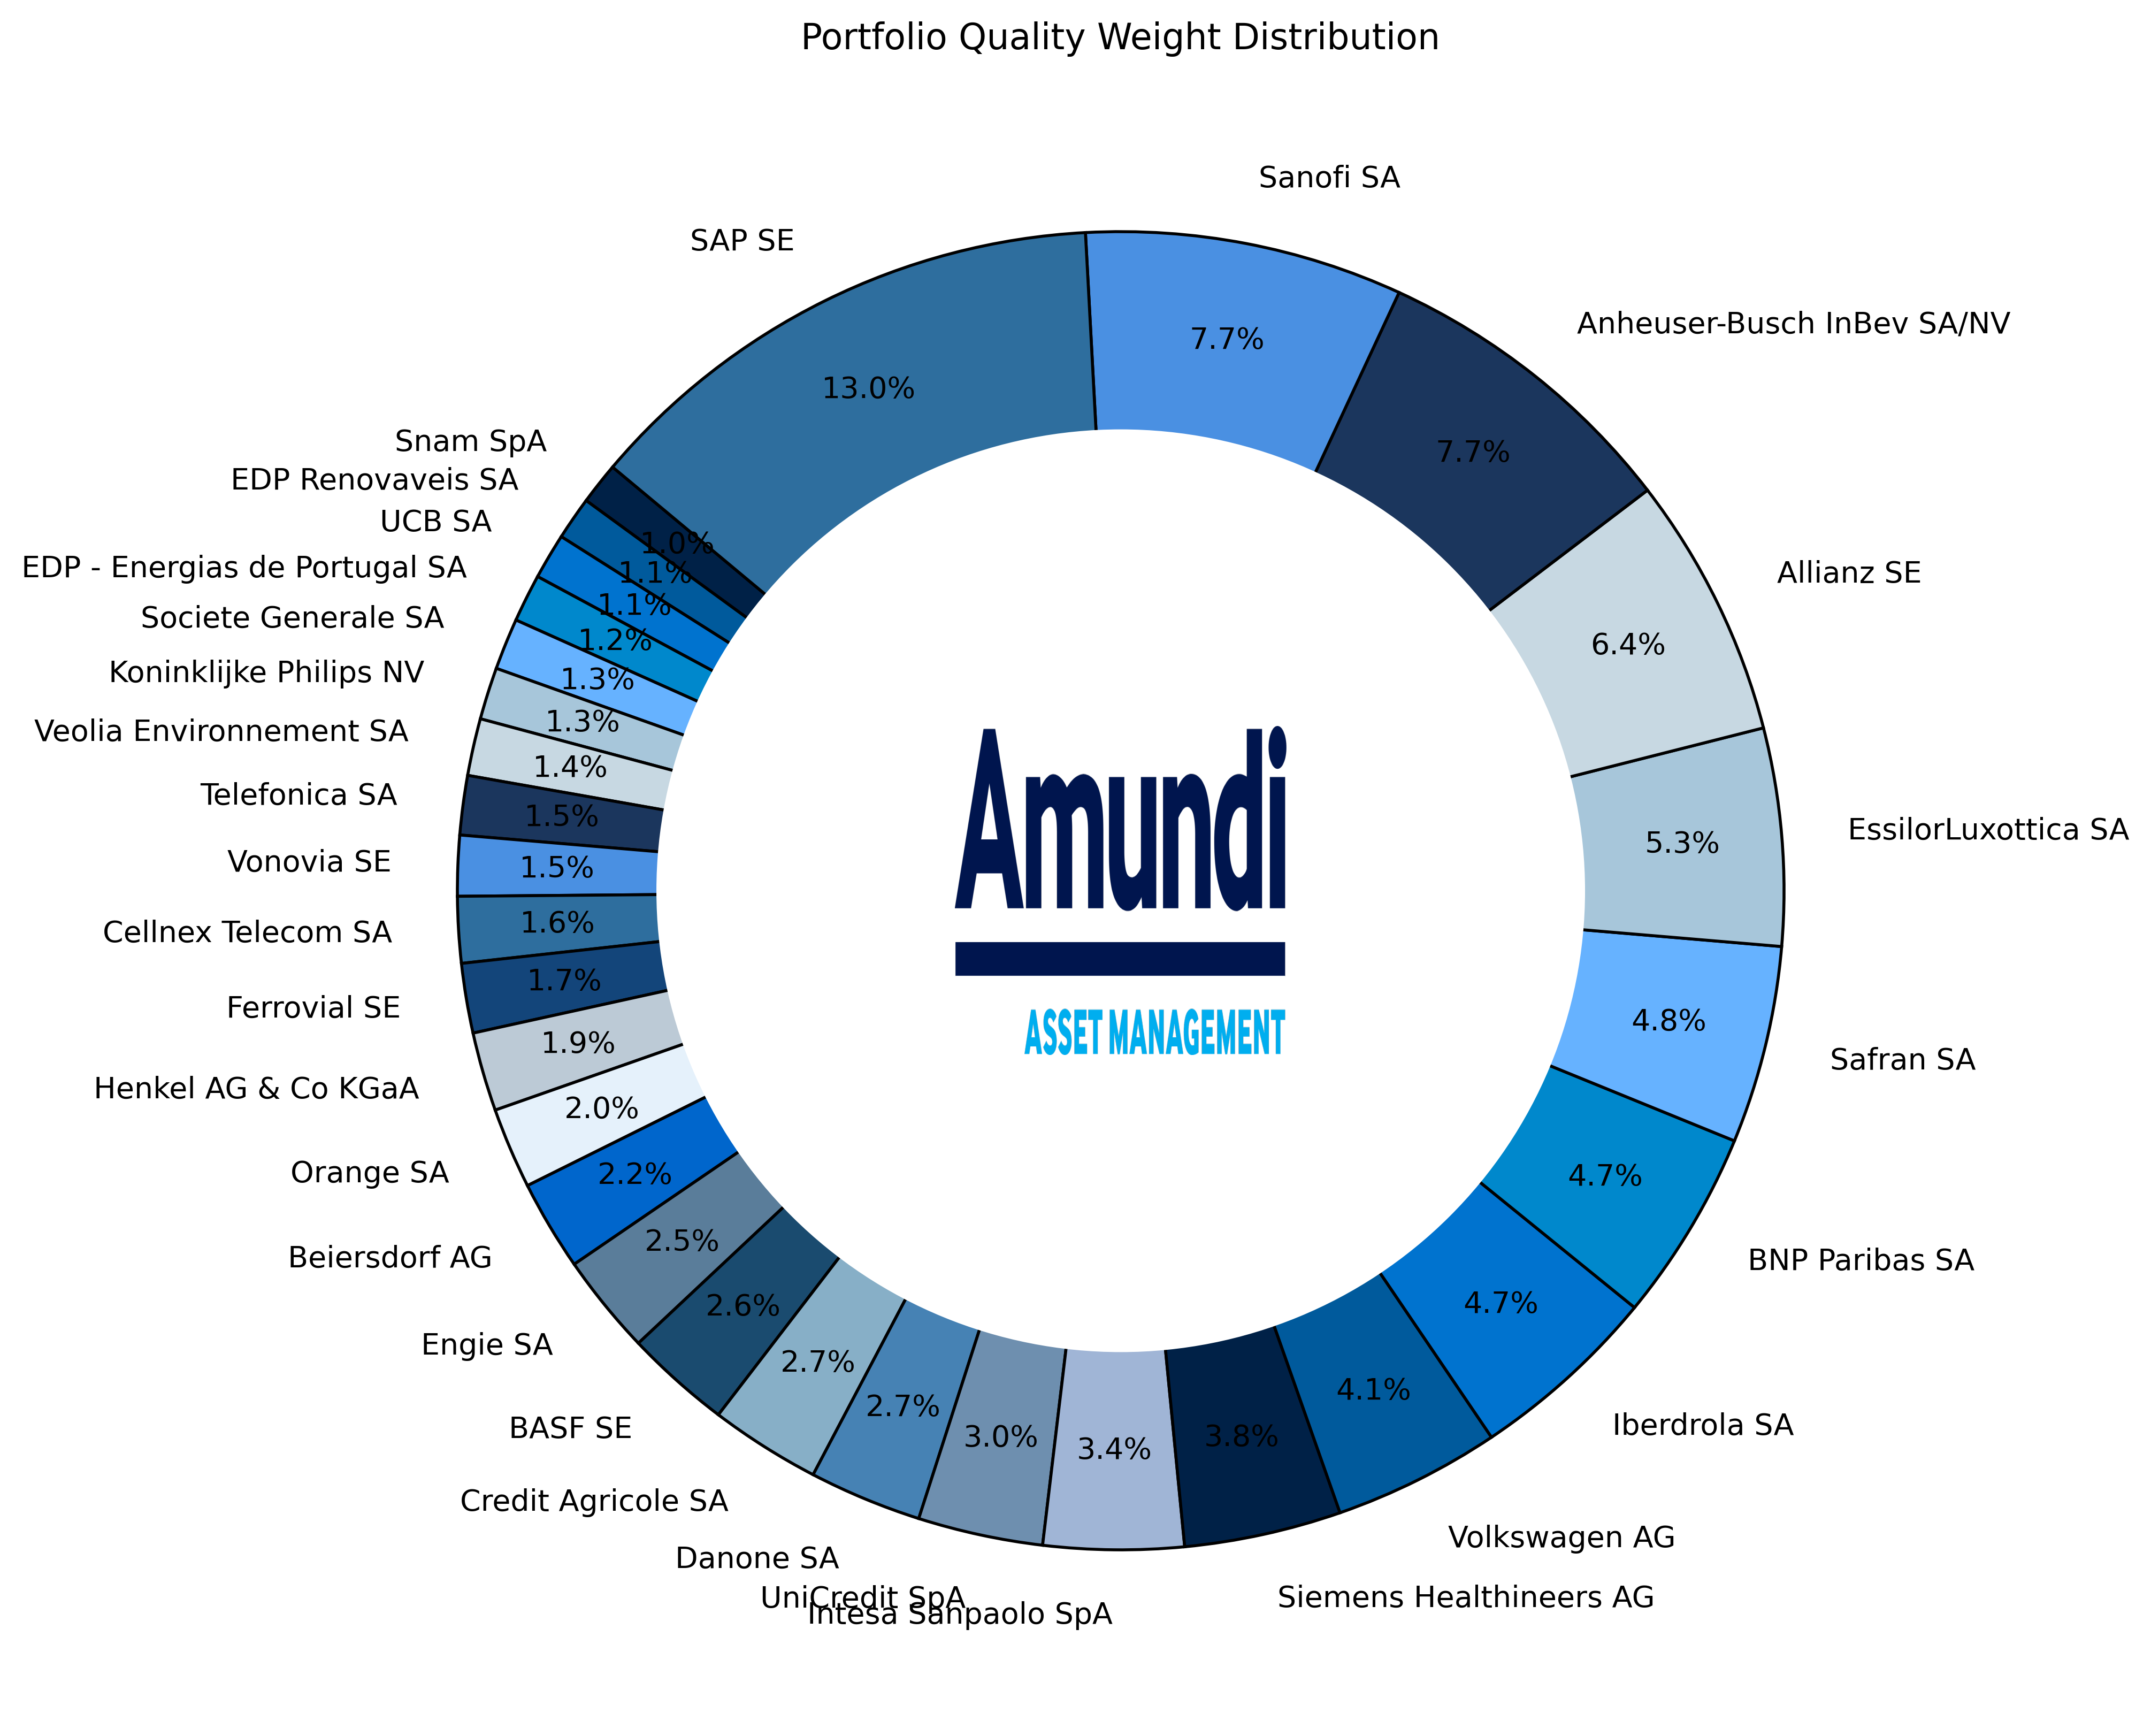

In [80]:
import matplotlib.image as mpimg

amundi_colors = [
    "#002147",  # Deep Blue (Main Amundi Color)
    "#005A9C",  # Medium Blue
    "#0073CF",  # Royal Blue
    "#0088CC",  # Light Blue
    "#66B2FF",  # Sky Blue
    "#A7C6DA",  # Soft Blue
    "#C7D8E2",  # Very Light Blue
    "#1B365D",  # Deep Navy
    "#4A90E2",  # Brighter Blue
    "#2E6E9E",  # Steel Blue
    "#13457A",  # Dark Blue
    "#BCCAD6",  # Greyish Blue
    "#E5F1FB",  # Pale Blue
    "#0066CC",  # Amundi Bright Blue
    "#5A7D9A",  # Muted Steel Blue
    "#1A4B6F",  # Dark Teal Blue
    "#87AFC7",  # Metallic Blue
    "#4682B4",  # Steel Blue
    "#6E8FAF",  # Business Blue
    "#A0B5D6"   # Soft Investor Blue
]


df = value_unverse.copy().sort_values(by = 'value_portfolio_weight')
plt.figure(figsize=(10, 10), dpi = 400)
plt.pie(
    df["value_portfolio_weight"],
    labels=df.index,
    autopct='%1.1f%%',
    colors=amundi_colors[:len(df)],
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)

# Add a title
plt.title("Portfolio Quality Weight Distribution")

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)


# Add Amundi logo in the center
logo = mpimg.imread("data/amundi_logo.png")
plt.imshow(logo, extent=[-0.25, 0.25, -0.25, 0.25], aspect='auto', zorder=10)  # Adjusted size for better fit


plt.savefig("bar_charts_quality_company_weights.png", bbox_inches='tight', dpi=600)

In [81]:
sector_weighting = value_unverse.groupby(by = 'GICS_SECTOR_NAME').sum()

In [82]:
sector_weighting

,CUR_MKT_CAP,Performance,ROE,value_portfolio_weight
GICS_SECTOR_NAME,,,,
Communication Services,7.648271e+10,30.754173,16.354069,0.050587
Consumer Discretionary,6.165513e+10,-3.968388,10.571450,0.040780
Consumer Staples,2.208019e+11,61.660133,30.790898,0.146044
Financials,3.257128e+11,183.325978,44.472465,0.215434
Health Care,2.915497e+11,84.349016,22.359726,0.192838
Industrials,9.907222e+10,71.324608,-18.157738,0.065529
Information Technology,1.971749e+11,44.703804,8.976975,0.130416
Materials,3.908801e+10,5.151975,-1.560381,0.025854
Real Estate,2.241088e+10,29.609442,-2.004727,0.014823


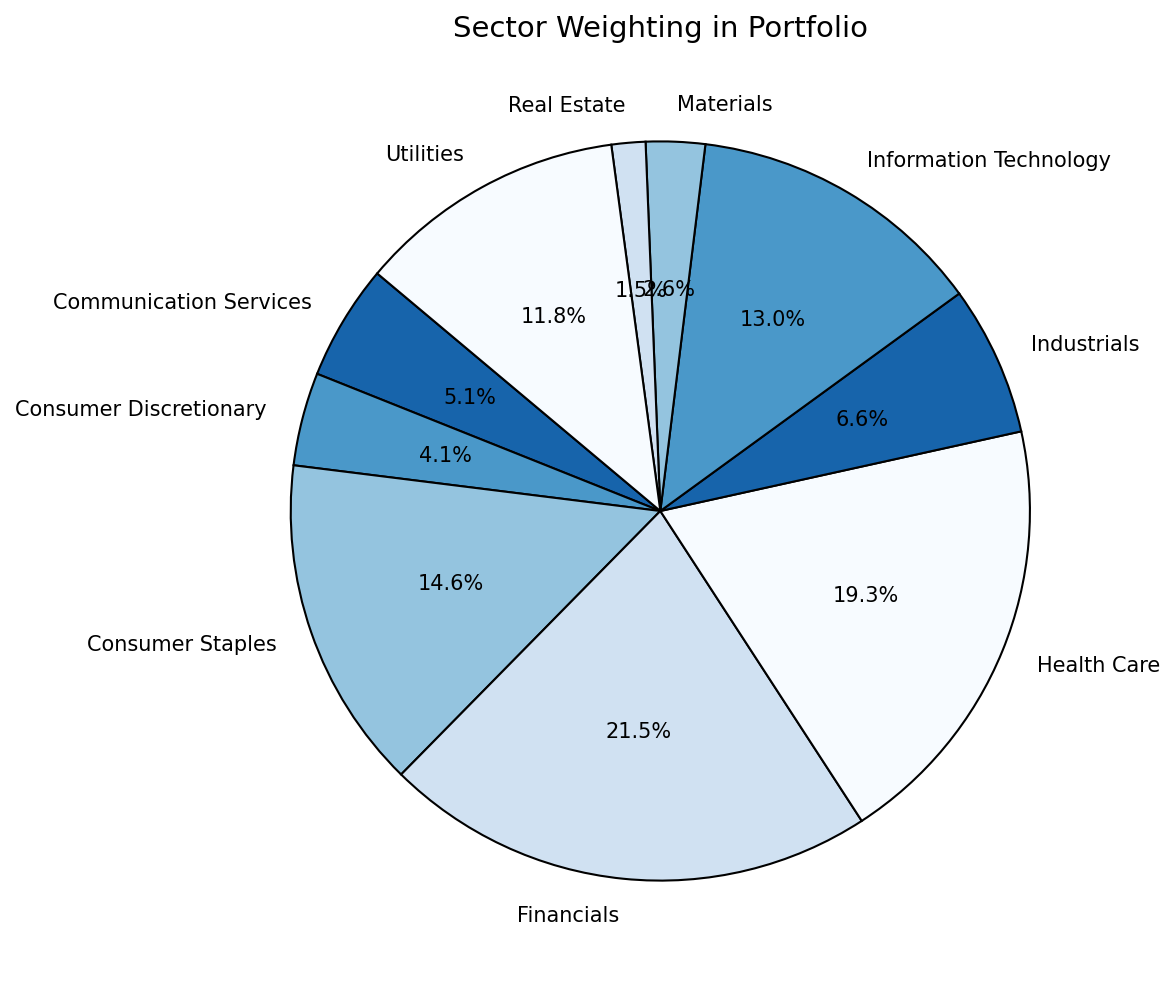

In [83]:
colors = plt.cm.Blues_r([0.2, 0.4, 0.6, 0.8, 1.0])

plt.figure(figsize=(8, 8), dpi = 150)
plt.pie(sector_weighting["value_portfolio_weight"], labels=sector_weighting.index, 
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Sector Weighting in Portfolio", fontsize=14)

# Show plot
plt.show()

In [84]:
sector_weighting_initial_universe = universe_initial.loc[:,['GICS_SECTOR_NAME','CUR_MKT_CAP']].groupby(by = 'GICS_SECTOR_NAME').sum()
sector_weighting_initial_universe['portfolio_weight'] = sector_weighting_initial_universe['CUR_MKT_CAP'] / sector_weighting_initial_universe['CUR_MKT_CAP'].sum()

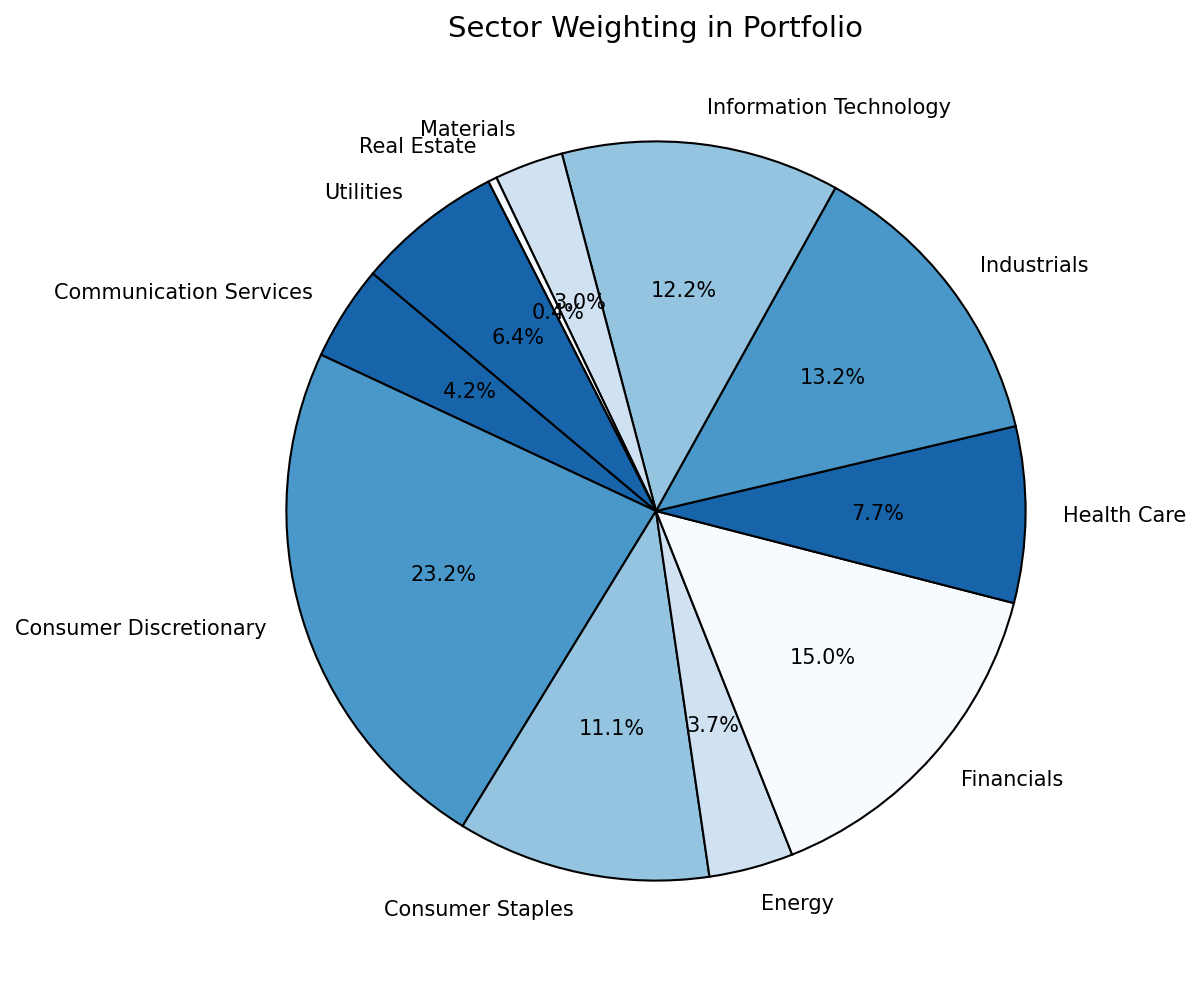

In [85]:
plt.figure(figsize=(8, 8), dpi = 150)
plt.pie(sector_weighting_initial_universe['portfolio_weight'], labels=sector_weighting_initial_universe.index, 
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Sector Weighting in Portfolio", fontsize=14)

# Show plot
plt.show()

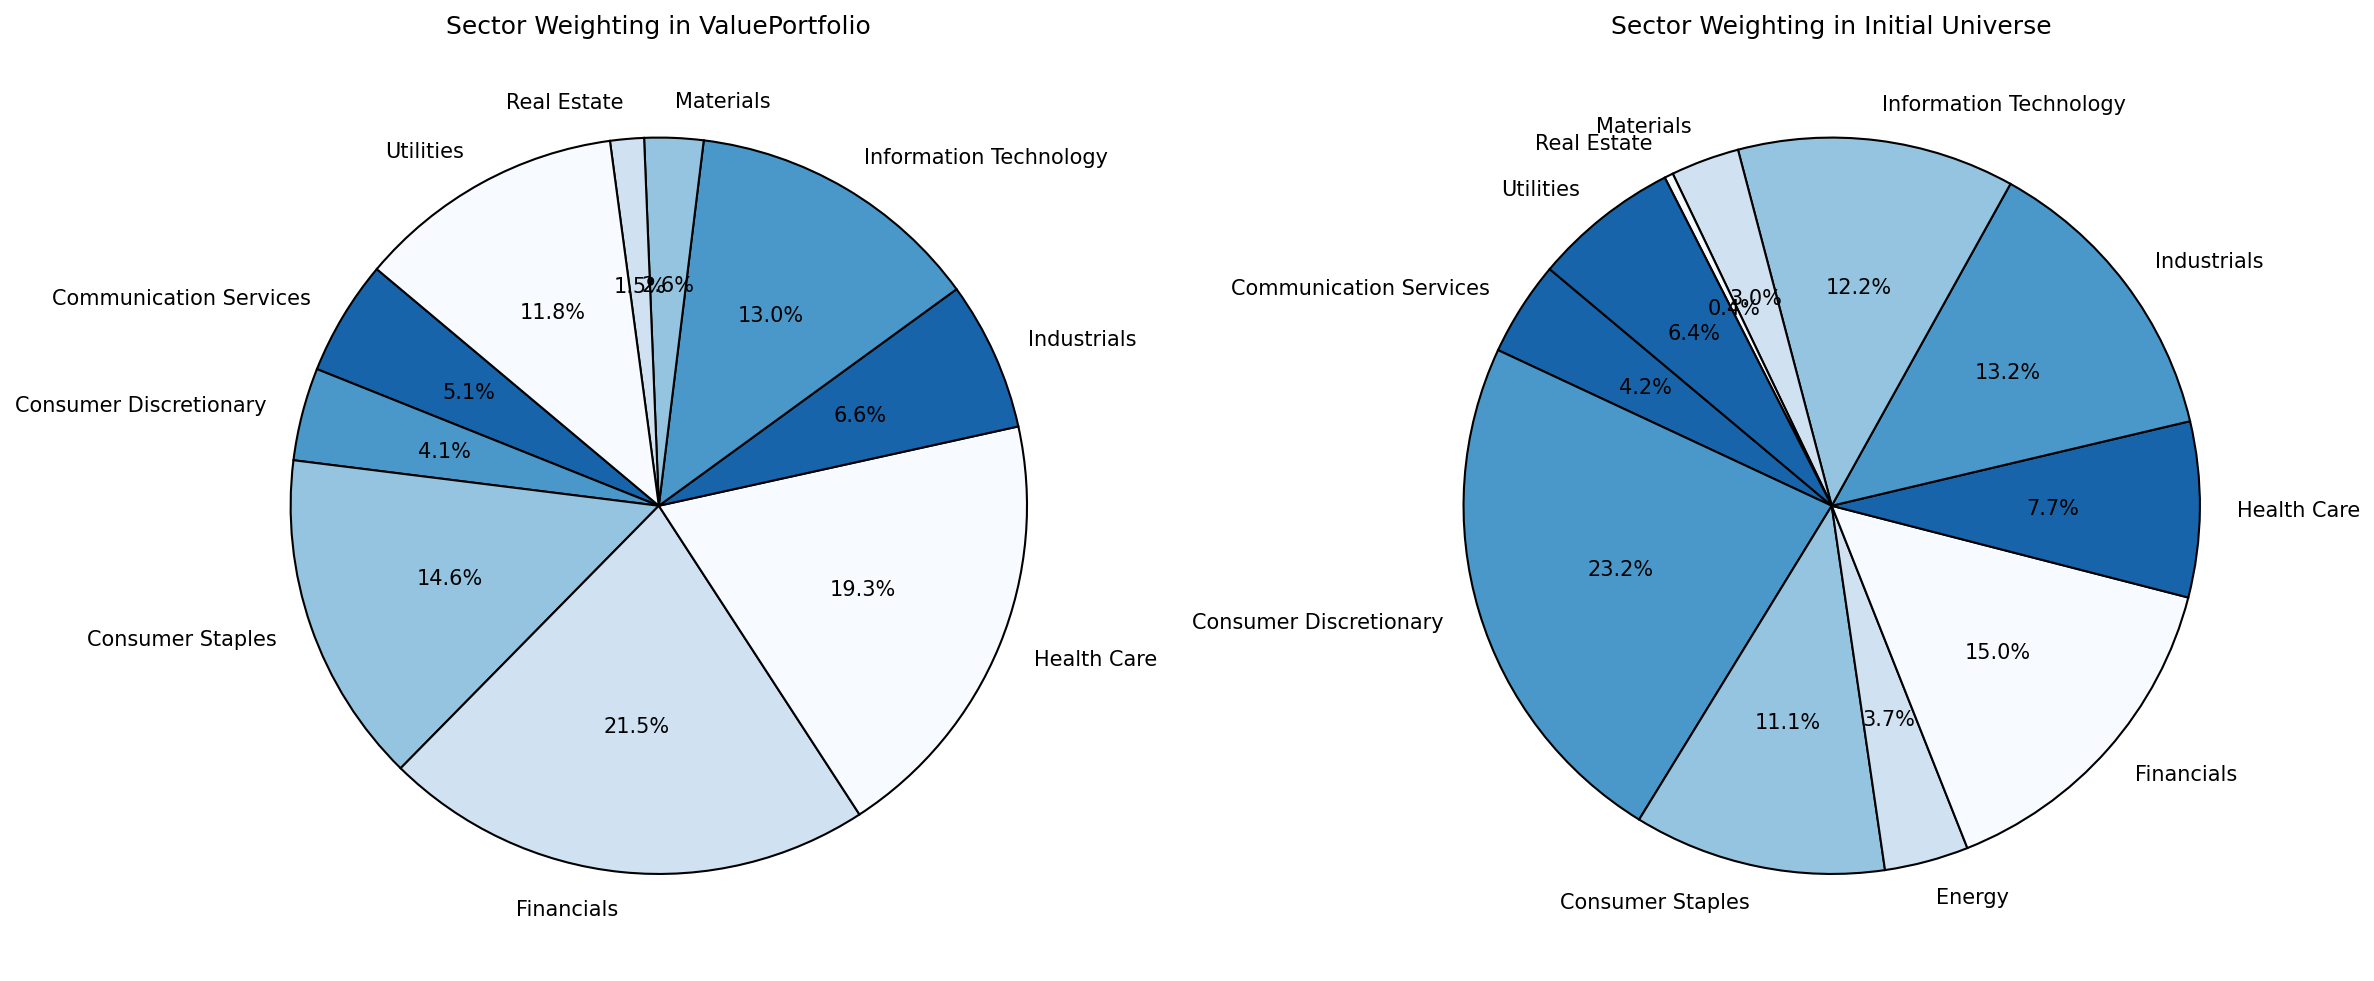

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=150)

# Pie chart 1: sector_weighting
axes[0].pie(sector_weighting["value_portfolio_weight"], labels=sector_weighting.index, 
            autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Sector Weighting in ValuePortfolio")

# Pie chart 2: sector_weighting_initial_universe
axes[1].pie(sector_weighting_initial_universe['portfolio_weight'], labels=sector_weighting_initial_universe.index, 
            autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Sector Weighting in Initial Universe")

# Show plot
plt.tight_layout()
plt.show()


In [87]:
sector_weighting

,CUR_MKT_CAP,Performance,ROE,value_portfolio_weight
GICS_SECTOR_NAME,,,,
Communication Services,7.648271e+10,30.754173,16.354069,0.050587
Consumer Discretionary,6.165513e+10,-3.968388,10.571450,0.040780
Consumer Staples,2.208019e+11,61.660133,30.790898,0.146044
Financials,3.257128e+11,183.325978,44.472465,0.215434
Health Care,2.915497e+11,84.349016,22.359726,0.192838
Industrials,9.907222e+10,71.324608,-18.157738,0.065529
Information Technology,1.971749e+11,44.703804,8.976975,0.130416
Materials,3.908801e+10,5.151975,-1.560381,0.025854
Real Estate,2.241088e+10,29.609442,-2.004727,0.014823


In [88]:
for i in ['Materials','Energy']:
    sector_weighting.loc[i,['CUR_MKT_CAP','value_portfolio_weight']] = 0
    

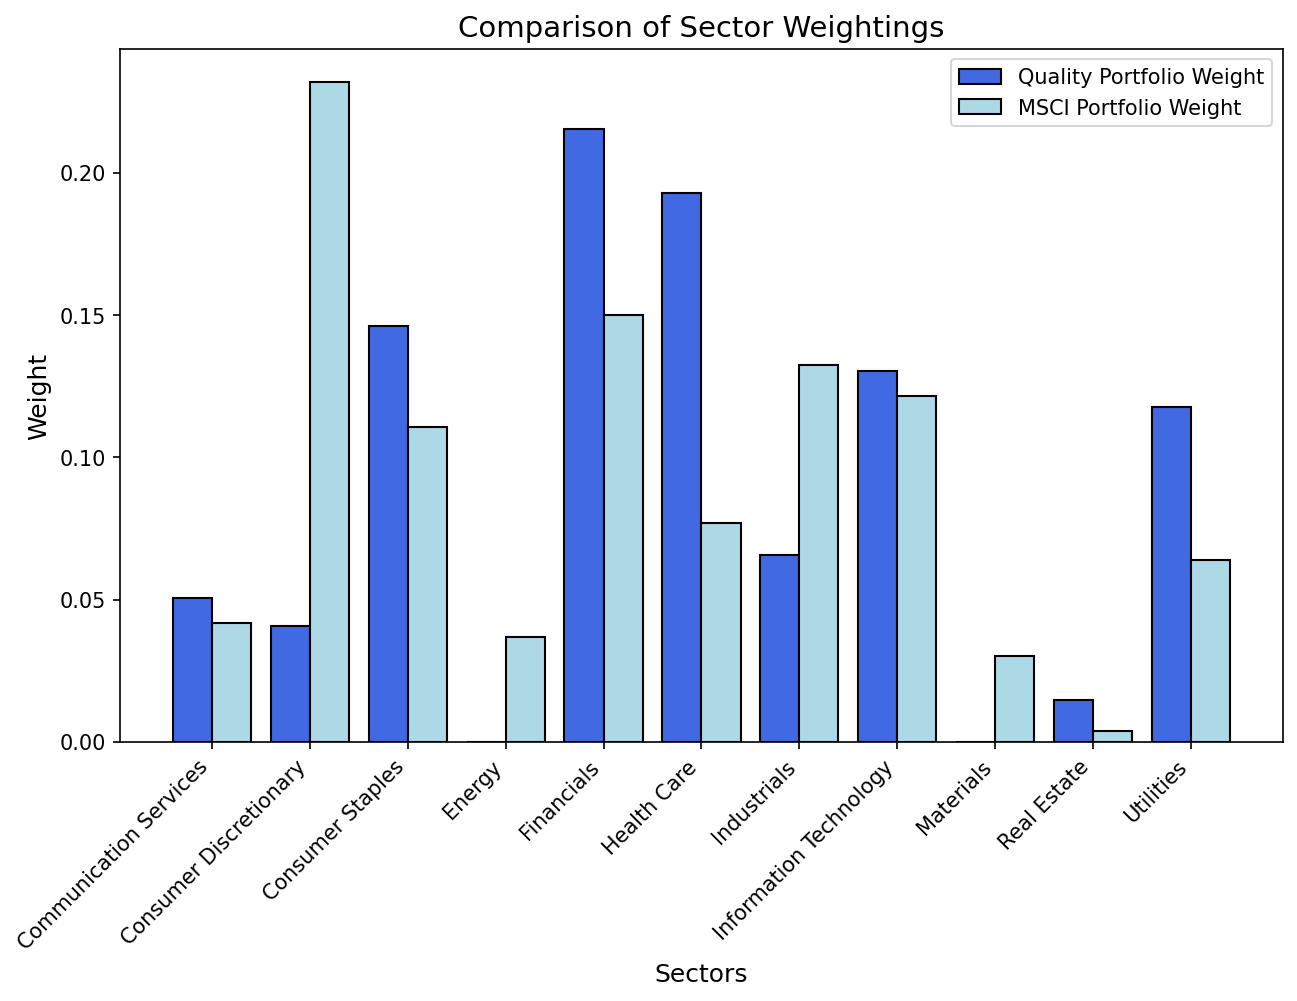

In [89]:
import numpy as np

# Define sector names
sectors = sector_weighting_initial_universe.index

# Define values for both portfolio weights
portfolio_weights = sector_weighting.loc[sector_weighting_initial_universe.index,"value_portfolio_weight"].values
initial_weights = sector_weighting_initial_universe.loc[sector_weighting_initial_universe.index,"portfolio_weight"].values

# Define positions for bars
x = np.arange(len(sectors))

# Create the bar chart
plt.figure(figsize=(10, 6), dpi=150)
bar_width = 0.4

plt.bar(x - bar_width/2, portfolio_weights, bar_width, label="Quality Portfolio Weight", color='royalblue', edgecolor='black')
plt.bar(x + bar_width/2, initial_weights, bar_width, label="MSCI Portfolio Weight", color='lightblue', edgecolor='black')

# Labels and title
plt.xlabel("Sectors", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.title("Comparison of Sector Weightings", fontsize=14)
plt.xticks(ticks=x, labels=sectors, rotation=45, ha="right")
plt.legend()

plt.savefig("bar_charts_quality_sector_weights.png", bbox_inches='tight', dpi=600)


## Comparing portfolio ratios

Performance	ROE	price-to-book. Know if my portfolio outperform or underperform benchmark.

In [90]:
initial_portfolio_ROE = np.sum(universe.loc[:,'Weight'] * universe.loc[:,'ROE'])
initial_portfolio_Performance = np.sum(universe.loc[:,'Weight'] * universe.loc[:,'Performance'])
initial_portfolio_BY = np.sum(universe.loc[:,'Weight'] * universe.loc[:,'Book Yield'])

value_unverse = universe.loc[list(set(selected_stocks)),:]
value_unverse['Weight'] = value_unverse['CUR_MKT_CAP'] / np.sum(value_unverse['CUR_MKT_CAP'])

value_universe_ROE = np.sum(value_unverse.loc[:,'Weight'] * value_unverse.loc[:,'ROE'])
value_universe_Performance = np.sum(value_unverse.loc[:,'Weight'] * value_unverse.loc[:,'Performance'])
value_universe_BY = np.sum(value_unverse.loc[:,'Weight'] * value_unverse.loc[:,'Book Yield'])

In [205]:
value_unverse_ROE

15.283515850539585

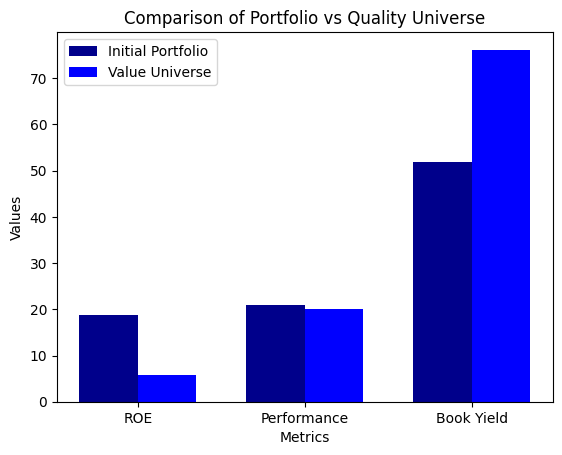

In [91]:
# Data for the bar chart
categories = ['ROE', 'Performance', 'Book Yield']
initial_portfolio_values = [initial_portfolio_ROE, initial_portfolio_Performance, initial_portfolio_BY]
value_universe_values = [value_universe_ROE, value_universe_Performance, value_universe_BY]

# Bar chart settings
x = np.arange(len(categories))  # the label locations
width = 0.35  # width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initial_portfolio_values, width, label='Initial Portfolio', color = 'darkblue')
rects2 = ax.bar(x + width/2, value_universe_values, width, label='Value Universe', color = 'blue')

# Labels and formatting
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Portfolio vs Quality Universe')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.savefig("performance_quality_vs_market.png", bbox_inches='tight', dpi=600)